In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Walmart_Sales.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
df.shape

(6435, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
# checking for null Values

df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [8]:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,6435.0,2.300000e+01,12.988182,1.000,12.000,23.000000,3.400000e+01,4.500000e+01
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
Holiday_Flag,6435.0,6.993007e-02,0.255049,0.000,0.000,0.000000,0.000000e+00,1.000000e+00
Temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
Fuel_Price,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
CPI,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
Unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01


In [10]:
df.columns.tolist()

['Store',
 'Date',
 'Weekly_Sales',
 'Holiday_Flag',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment']

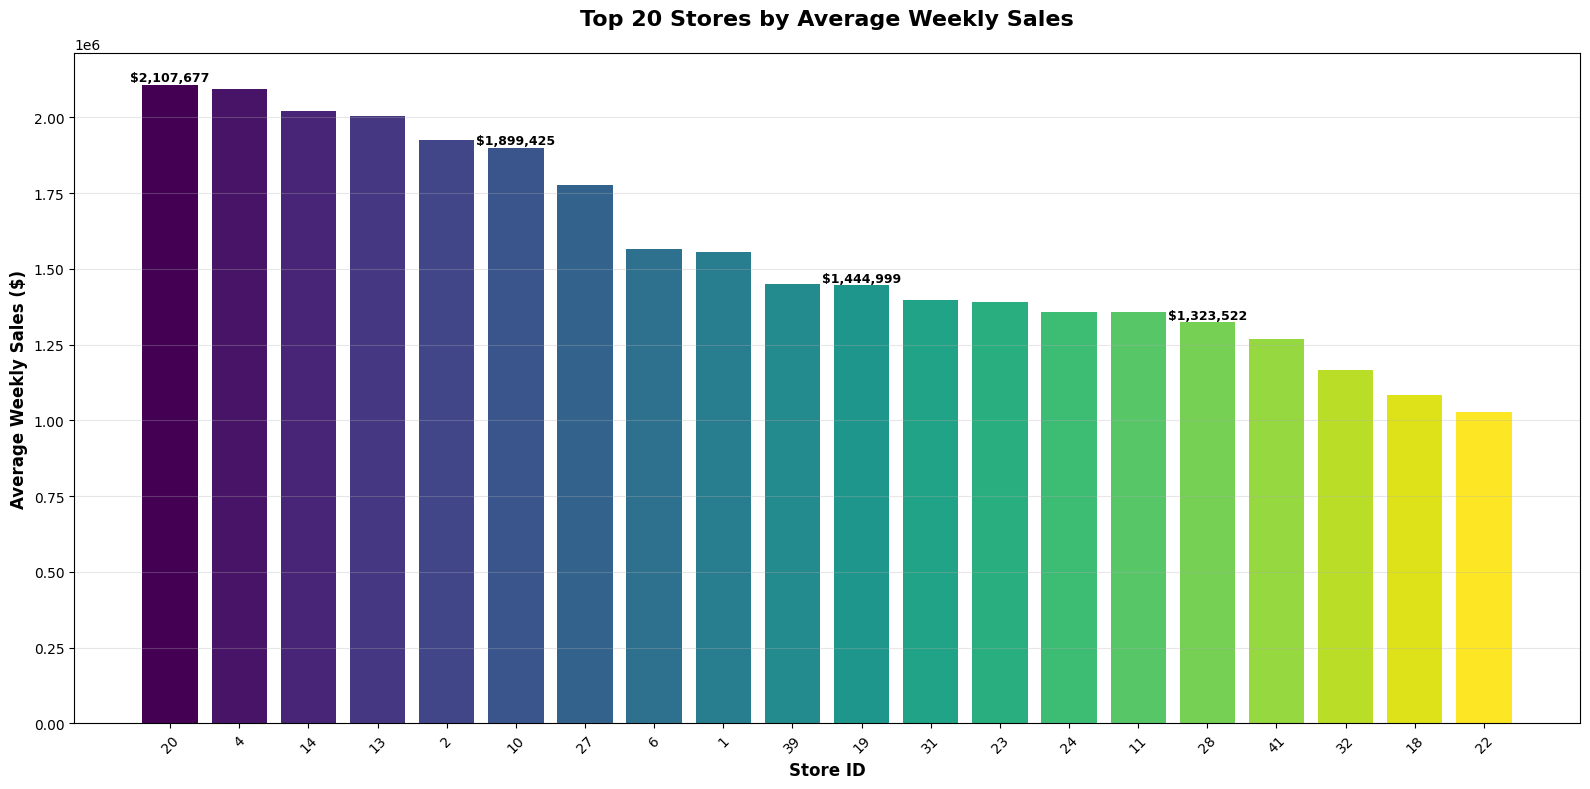

🏆 Best Performing Store: #20 ($2,107,676.87)


In [12]:
# Bar chart: Average sales by store (Top 20 for better visualization)
plt.figure(figsize=(16, 8))

# Calculate average sales per store and get top 20
store_performance = df.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False).head(20)

bars = plt.bar(range(len(store_performance)), store_performance.values, 
               color=plt.cm.viridis(np.linspace(0, 1, len(store_performance))))

plt.title('Top 20 Stores by Average Weekly Sales', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Store ID', fontsize=12, fontweight='bold')
plt.ylabel('Average Weekly Sales ($)', fontsize=12, fontweight='bold')
plt.xticks(range(len(store_performance)), store_performance.index, rotation=45)

# Add value labels on bars (only show every 5th to avoid clutter)
for i, bar in enumerate(bars):
    height = bar.get_height()
    if i % 5 == 0:  # Show label only for every 5th bar
        plt.text(bar.get_x() + bar.get_width()/2., height + 1000,
                 f'${height:,.0f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"🏆 Best Performing Store: #{store_performance.index[0]} (${store_performance.iloc[0]:,.2f})")

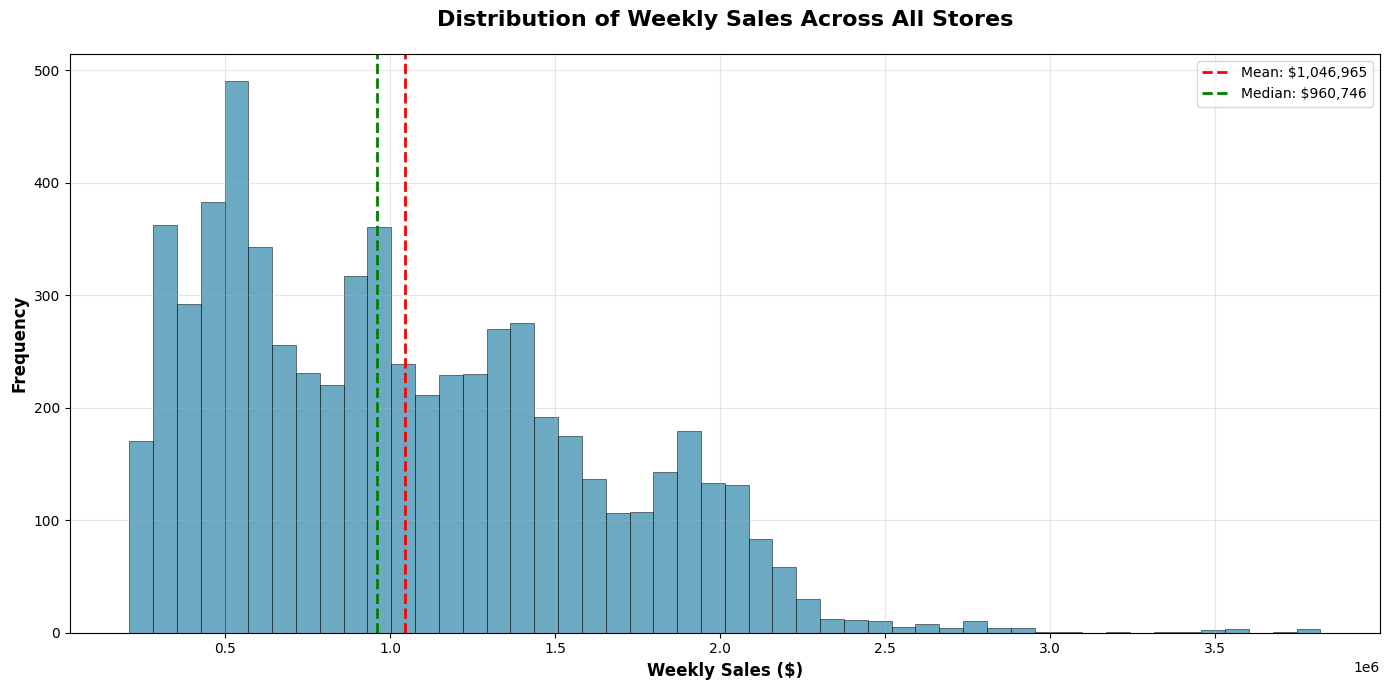

📈 Sales Statistics:
Mean Weekly Sales: $1,046,964.88
Median Weekly Sales: $960,746.04
Standard Deviation: $564,366.62


In [13]:
# Histogram: Distribution of weekly sales
plt.figure(figsize=(14, 7))

# Use more bins for large dataset
n, bins, patches = plt.hist(df['Weekly_Sales'], bins=50, alpha=0.7, color='#2E86AB', 
                            edgecolor='black', linewidth=0.5)

plt.title('Distribution of Weekly Sales Across All Stores', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Weekly Sales ($)', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')

# Add statistical lines
mean_sales = df['Weekly_Sales'].mean()
median_sales = df['Weekly_Sales'].median()
plt.axvline(mean_sales, color='red', linestyle='--', linewidth=2, label=f'Mean: ${mean_sales:,.0f}')
plt.axvline(median_sales, color='green', linestyle='--', linewidth=2, label=f'Median: ${median_sales:,.0f}')

plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"📈 Sales Statistics:")
print(f"Mean Weekly Sales: ${mean_sales:,.2f}")
print(f"Median Weekly Sales: ${median_sales:,.2f}")
print(f"Standard Deviation: ${df['Weekly_Sales'].std():,.2f}")

/tmp/ipykernel_19274/3948636048.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = plt.boxplot(box_data, labels=['Non-Holiday', 'Holiday'], patch_artist=True)


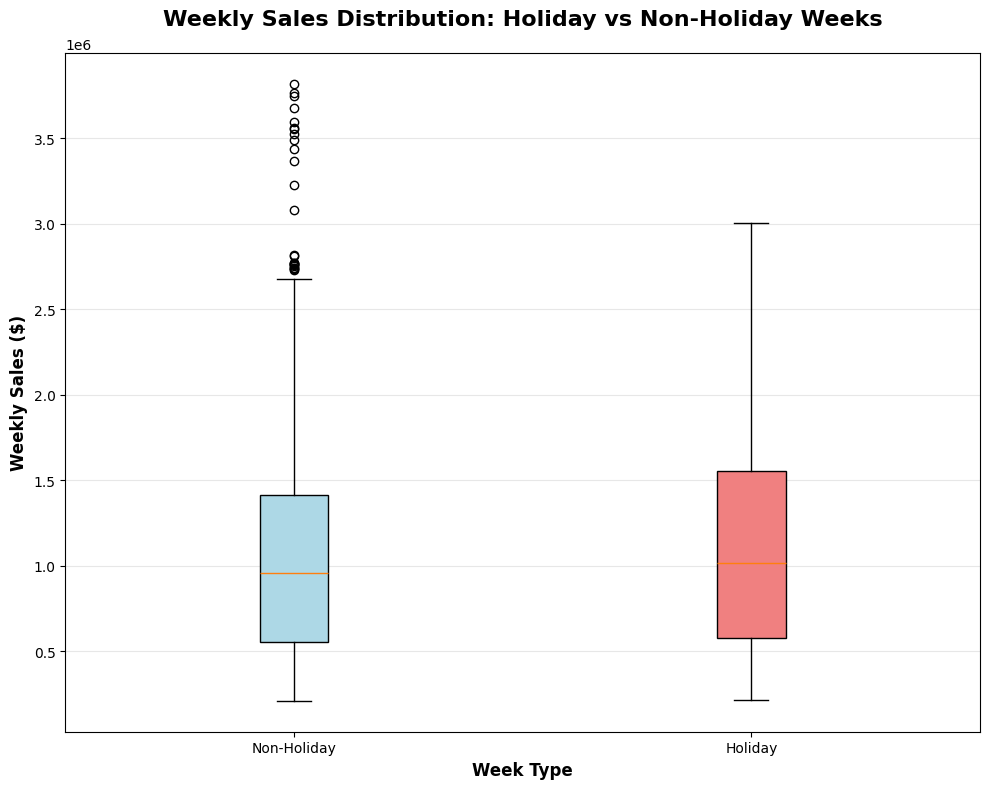

📅 Holiday vs Non-Holiday Sales Comparison:
Holiday Weeks - Mean: $1,122,887.89, Count: 450.0
Non-Holiday Weeks - Mean: $1,041,256.38, Count: 5,985.0


In [14]:
# Box plot: Sales distribution by holiday vs non-holiday
plt.figure(figsize=(10, 8))

# Create box plot
box_data = [df[df['Holiday_Flag'] == 0]['Weekly_Sales'], 
            df[df['Holiday_Flag'] == 1]['Weekly_Sales']]

box_plot = plt.boxplot(box_data, labels=['Non-Holiday', 'Holiday'], patch_artist=True)

# Customize box colors
colors = ['lightblue', 'lightcoral']
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)

plt.title('Weekly Sales Distribution: Holiday vs Non-Holiday Weeks', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Weekly Sales ($)', fontsize=12, fontweight='bold')
plt.xlabel('Week Type', fontsize=12, fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Print statistics
holiday_stats = df[df['Holiday_Flag'] == 1]['Weekly_Sales'].describe()
non_holiday_stats = df[df['Holiday_Flag'] == 0]['Weekly_Sales'].describe()

print("📅 Holiday vs Non-Holiday Sales Comparison:")
print(f"Holiday Weeks - Mean: ${holiday_stats['mean']:,.2f}, Count: {holiday_stats['count']:,}")
print(f"Non-Holiday Weeks - Mean: ${non_holiday_stats['mean']:,.2f}, Count: {non_holiday_stats['count']:,}")

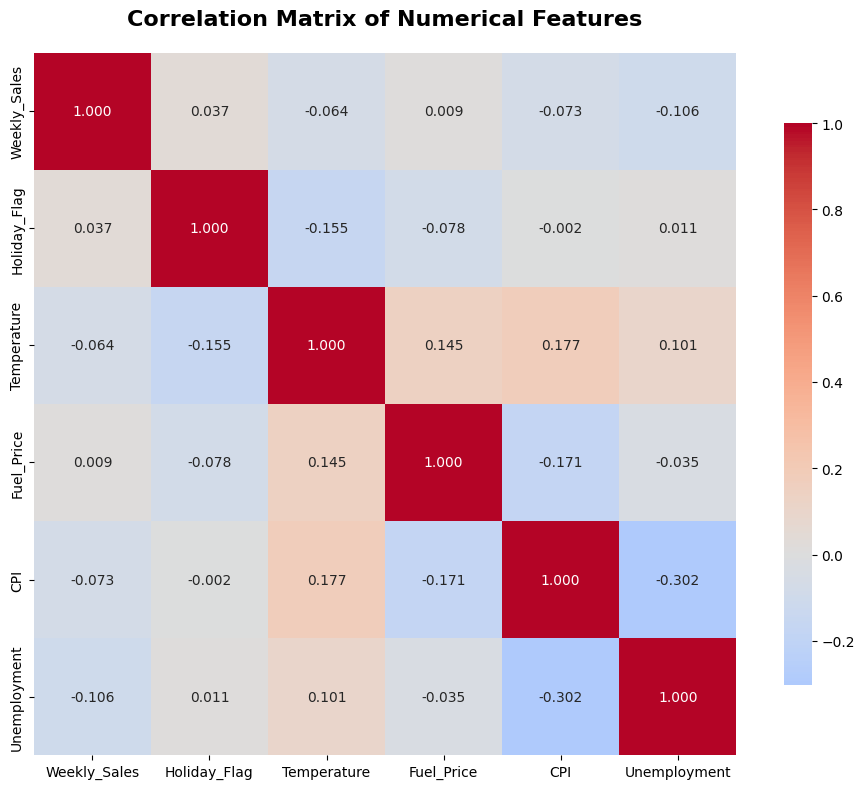

🔗 Feature Correlations with Weekly_Sales:
Weekly_Sales: 1.000
Holiday_Flag: 0.037
Fuel_Price: 0.009
Temperature: -0.064
CPI: -0.073
Unemployment: -0.106


In [16]:
import seaborn as sns

# Heatmap: Correlation between numerical features
plt.figure(figsize=(10, 8))

# Select numerical columns for correlation
numerical_cols = ['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
correlation_matrix = df[numerical_cols].corr()

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.3f', cbar_kws={'shrink': 0.8})

plt.title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("🔗 Feature Correlations with Weekly_Sales:")
sales_correlations = correlation_matrix['Weekly_Sales'].sort_values(ascending=False)
for feature, corr in sales_correlations.items():
    print(f"{feature}: {corr:.3f}")